# Simple Linear Regression (Hours of study)

The goal of this project was to build a linear regression model from the ground up using scikitlearn.

In [1]:
%matplotlib inline

#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the data

In [2]:
fitness = np.loadtxt("experiments/1676302198Fitness.txt")
shForces = np.loadtxt("experiments/1676302198ShForces.txt")
shMoments = np.loadtxt("experiments/1676302198ShMoments.txt")

In [3]:
pf = np.arange(shForces.shape[0])
for i in range(shForces.shape[0]):
    for j in range(shForces.shape[0]):  
        if shForces[i] < shForces[j] and shMoments[i] < shMoments[j]:
            pf[j] = -1
pf = np.where(pf != -1)

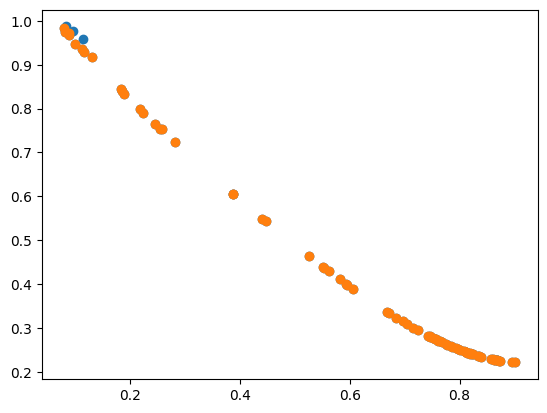

In [4]:
plt.scatter(shForces, shMoments)
plt.scatter(shForces[pf], shMoments[pf])
shForces = shForces[pf]
shMoments = shMoments[pf]
fitness = fitness[pf]

In [5]:
alpha = (fitness - shMoments)/(shForces - shMoments)

In [6]:
x = np.vstack((shForces, shMoments)).T
y = alpha

### Training the Algorithm

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(58, 2) (15, 2) (58,) (15,)


In [8]:
from sklearn import datasets, linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)
print(regressor.intercept_)
print(regressor.coef_)

2.318365587502333
[-1.99788826 -1.63805021]


In [9]:
Y_pred = regressor.predict(X_test)

In [10]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
0,0.541673,0.574240
1,0.612306,0.544565
2,0.585586,0.565360
3,0.168107,0.204993
4,0.284869,0.280057
5,0.554632,0.575151
6,0.391241,0.371367
7,0.606650,0.557550
8,0.100436,0.167351
9,0.204600,0.230845


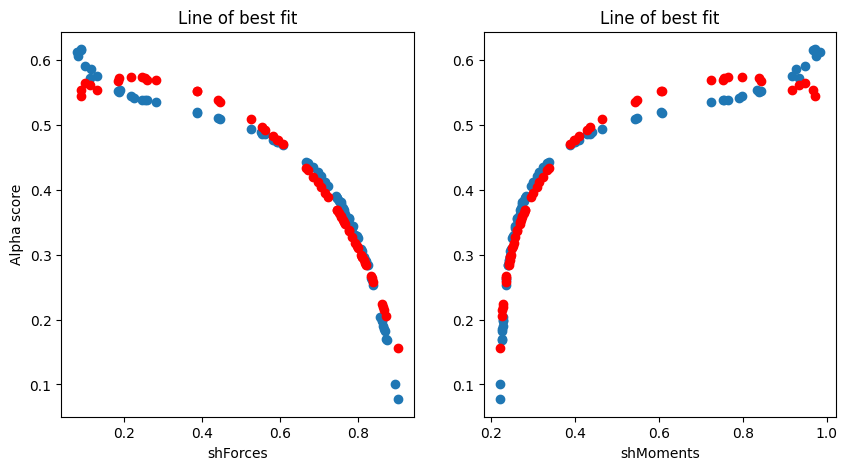

In [14]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], y)
#plt.scatter(X_test[:, 0], Y_pred, color='red')
plt.scatter(X_train[:, 0], regressor.predict(X_train), color='red')
plt.xlabel('shForces')
plt.ylabel('Alpha score')
plt.title('Line of best fit')

plt.subplot(1, 2, 2)
plt.scatter(x[:, 1], y)
#plt.scatter(X_test[:, 1], Y_pred, color='red')
plt.scatter(X_train[:, 1], regressor.predict(X_train), color='red')
plt.xlabel('shMoments')
plt.title('Line of best fit')
plt.show()

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, alpha = 0.1)
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test)

In [ ]:
def accuracy(y, y_hat):
    accuracy = np.sum(np.square(y - y_hat)) / len(y)
    return accuracy


print("Accuracy on  test: ", accuracy(Y_test, y_hat = regressor.predict(X_test)))